In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_image = cv2.imread("cat.jpeg",cv2.COLOR_BGR2RGB)

In [3]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

In [4]:
laplacian_operator = np.array([[0,1,0],
                              [1,-4,1],
                              [0,1,0]])

In [5]:
edges = cv2.filter2D(gray_image,-1,laplacian_operator)

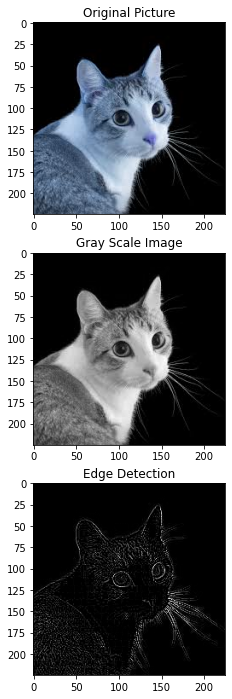

In [6]:
plt.figure(figsize=(8,12))

plt.subplot(3,1,1)
plt.title('Original Picture')
plt.imshow(original_image)

plt.subplot(3,1,2)
plt.title("Gray Scale Image")
plt.imshow(gray_image,cmap='gray')

plt.subplot(3,1,3)
plt.title('Edge Detection')
plt.imshow(edges,cmap='gray')

plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [3]:
(train_images,train_labels),(test_images,test_labels)= tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


In [4]:
train_images = train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images = test_images.reshape((10000,28,28,1)).astype('float32')/255

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Conv2D(64,(4,4),activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Conv2D(64,(4,4),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 64)            │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,850 (452.54 KB)

 Trainable params: 115,850 (452.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [9]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
def create_and_train_model(kernel_size):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                        validation_data=(x_test, y_test), verbose=0)
    
    return history

In [11]:
kernel_sizes = [4, 5, 6]
histories = {}

for kernel_size in kernel_sizes:
    print(f"Training with kernel size: {kernel_size}x{kernel_size}")
    histories[kernel_size] = create_and_train_model(kernel_size)

Training with kernel size: 4x4


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with kernel size: 5x5
Training with kernel size: 6x6


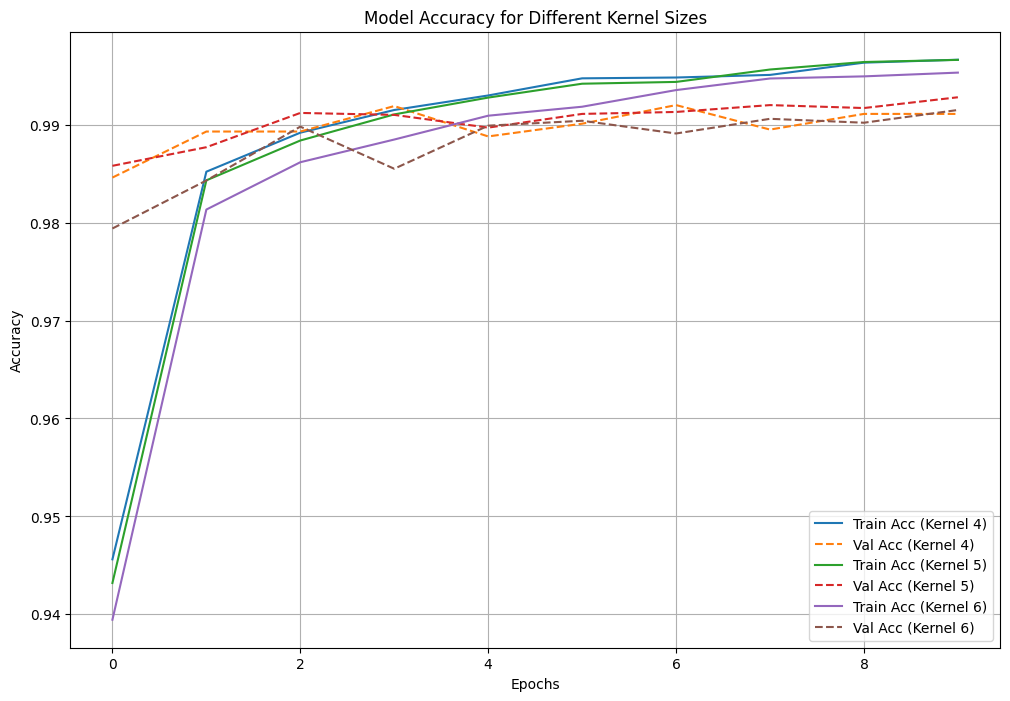

In [12]:
plt.figure(figsize=(12, 8))

for kernel_size in kernel_sizes:
    plt.plot(histories[kernel_size].history['accuracy'], label=f'Train Acc (Kernel {kernel_size})')
    plt.plot(histories[kernel_size].history['val_accuracy'], label=f'Val Acc (Kernel {kernel_size})', linestyle='--')

plt.title('Model Accuracy for Different Kernel Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [39]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
def create_and_train_model(kernel_size):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                        validation_data=(x_test, y_test), verbose=0)
    
    return model, history

In [41]:
kernel_sizes = [4, 5, 6]
histories = {}
best_model = None

for kernel_size in kernel_sizes:
    print(f"Training with kernel size: {kernel_size}x{kernel_size}")
    model, histories[kernel_size] = create_and_train_model(kernel_size)
    
    
    if kernel_size == 4:
        best_model = model

Training with kernel size: 4x4
Training with kernel size: 5x5
Training with kernel size: 6x6


In [42]:

# Save the best model with kernel size of 5 as .h5 file
if best_model:
    best_model.save('best_performing_model.h5')
    print("Model saved as 'best_performing_model.h5'")

Model saved as 'best_performing_model.h5'


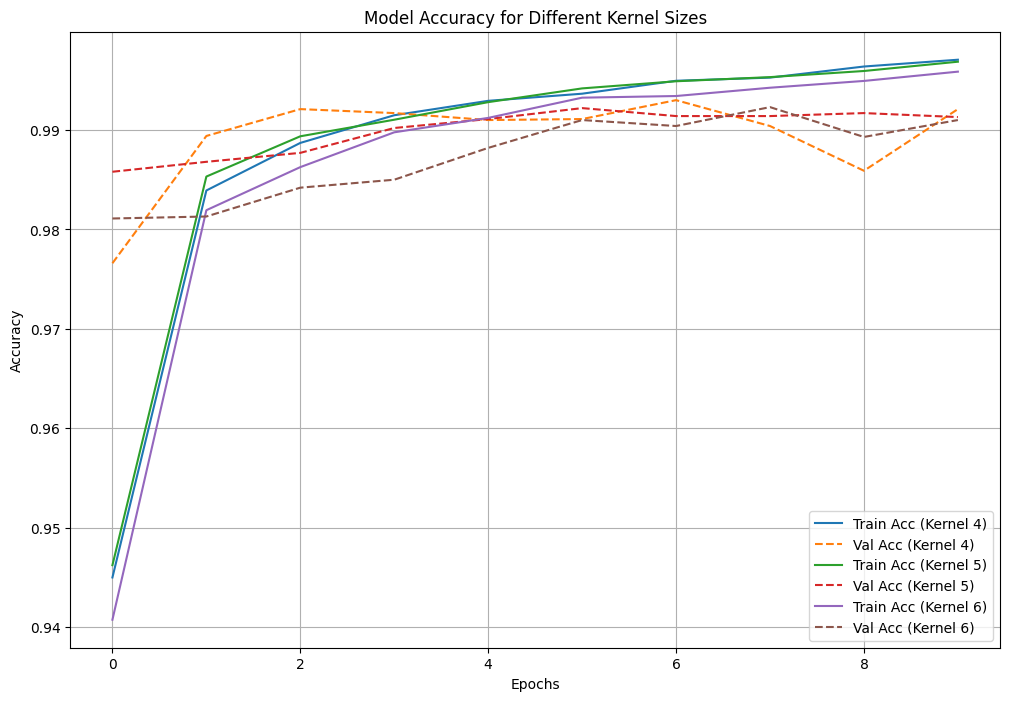

In [43]:
# Plotting accuracy
plt.figure(figsize=(12, 8))

for kernel_size in kernel_sizes:
    plt.plot(histories[kernel_size].history['accuracy'], label=f'Train Acc (Kernel {kernel_size})')
    plt.plot(histories[kernel_size].history['val_accuracy'], label=f'Val Acc (Kernel {kernel_size})', linestyle='--')

plt.title('Model Accuracy for Different Kernel Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [44]:
import numpy as np
import cv2  # OpenCV for image processing

def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img.astype('float32') / 255
        images.append(img)
    return np.array(images).reshape(-1, 28, 28, 1)

image_paths = [
    './Handwritten/000_1.png', './Handwritten/000_2.png',
    './Handwritten/111_1.png', './Handwritten/111_2.png',
    './Handwritten/222_1.png', './Handwritten/222_2.png',
    './Handwritten/333_1.png', './Handwritten/333_2.png',
    './Handwritten/444_1.png', './Handwritten/444_2.png',
    './Handwritten/555_1.png', './Handwritten/555_2.png',
    './Handwritten/666_1.png', './Handwritten/666_2.png',
    './Handwritten/777_1.png', './Handwritten/777_2.png',
    './Handwritten/888_1.png', './Handwritten/888_2.png'
]

# Load and preprocess the test images
x_test = load_and_preprocess_images(image_paths)

# Create corresponding labels for digits 0-8 (two samples each)
y_test = np.array([0]*2 + [1]*2 + [2]*2 + [3]*2 + [4]*2 + [5]*2 + [6]*2 + [7]*2 + [8]*2)
y_test = to_categorical(y_test)

In [45]:
from tensorflow.keras.models import load_model

# Load .h5 model
model = load_model('best_performing_model.h5')

In [46]:
predictions = model.predict(x_test)
predicted_class = np.argmax(predictions, axis=1)

true_class = np.argmax(y_test, axis=1)

# Accuracy
accuracy = np.sum(predicted_class == true_class) / len(true_class)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Accuracy on test set: 38.89%
